In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
pd.set_option('display.max_rows', 50) # выведем больше строк
pd.set_option('display.max_columns', 50) # выведем больше колонок
cacao = pd.read_csv('cacao_flavors.csv')

In [3]:
cacao.sample(10)

,Bar id,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
605,606,Eau de Rose,Arauca,1812,2016,70%,Canada,3.25,,Colombia
1139,1140,Mita,Tumaco,955,2012,265%,Colombia,2.50,,Colombia
1028,1029,Manufaktura Czekolady,Johe,1844,2016,70%,Poland,3.75,,Nicaragua
1416,1417,Sacred,Twilight,813,2012,69%,U.S.A.,3.25,,Central and S. America
972,973,Lillie Belle,Purple Haze,947,2012,75%,U.S.A.,2.75,,"Venezuela, Dom. Rep."
479,480,Damson,Los Rios,1610,2015,70%,U.K.,3.50,,Ecuador
1440,1441,Scharffen Berger,Bittersweet,15,2006,70%,U.S.A.,3.50,Blend,
278,279,,"Ecuador, Bob Bar",1323,2014,60%,U.S.A.,2.50,,Ecuador
729,730,Georgia Ramon,ABOCFA Coop,1642,2015,70%,Germany,4.00,Forastero,Ghana
130,131,Artisan du Chocolat,"Ocumare, Venezuela",355,2009,75%,U.K.,2.50,"Criollo, Trinitario",Venezuela


In [44]:
cacao.columns = (['bar_id', 'company','specific_origin', 'ref', 'review_date',
                  'cocoa_percent', 'company_location', 'rating', 'bean_type', 'bean_origin'])

In [10]:
cacao.sample()

,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
659,660,Fossa,"Kokoa Kamili Coop, Kilombero",1776,2016,67%,Singapore,3.75,Trinitario,Tanzania


In [12]:
cacao.drop(['bar_id'], inplace = True, axis = 1)

In [14]:
cacao.company = cacao.company.apply(lambda x: None if x.strip() == '' else x)

In [15]:
display(pd.DataFrame(cacao.company.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
      , (cacao.company.value_counts()>10).sum())
cacao.loc[:, ['company']].info()

,company
Soma,45
Fresco,26
Bonnat,26
Pralus,25
Domori,22
...,...
Lake Champlain (Callebaut),1
Forever Cacao,1
Vietcacao (A. Morin),1
Shattel,1


Значений, встретившихся в столбце более 10 раз: 30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   company  1696 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


In [22]:
len(cacao.specific_origin.value_counts()[cacao.specific_origin.value_counts()>10])

16

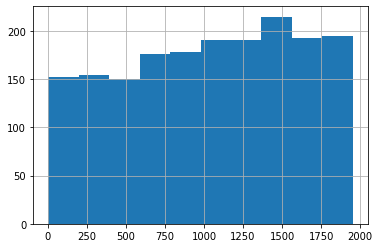

In [24]:
cacao.ref.hist()

count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: review_date, dtype: float64

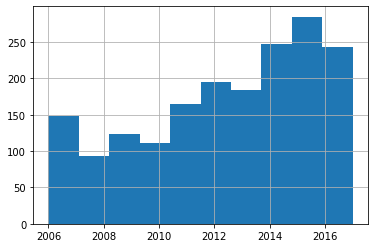

In [25]:
cacao.review_date.hist()
cacao.review_date.describe()

In [26]:
cacao.cocoa_percent = cacao.cocoa_percent.apply(lambda x: float(x.replace('%', '')))

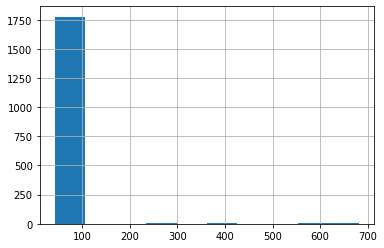

In [28]:
cacao.cocoa_percent.hist()

25-й перцентиль: 70.0, 75-й перцентиль: 75.0, IQR: 5.0,  Границы выбросов: [62.5, 82.5].


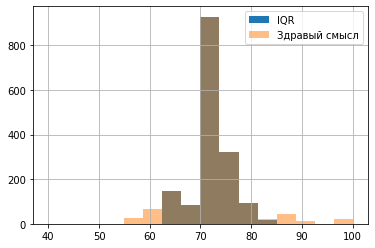

In [29]:
median = cacao.cocoa_percent.median()
IQR = cacao.cocoa_percent.quantile(0.75) - cacao.cocoa_percent.quantile(0.25)
perc25 = cacao.cocoa_percent.quantile(0.25)
perc75 = cacao.cocoa_percent.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
cacao.cocoa_percent.loc[cacao.cocoa_percent.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 16
                                                                                              , range = (40, 100), 
                                                                                             label = 'IQR')
cacao.cocoa_percent.loc[cacao.cocoa_percent <= 100].hist(alpha = 0.5, bins = 16, range = (40, 100),
                                                        label = 'Здравый смысл')
plt.legend();

In [45]:
cacao.bean_origin = cacao.bean_origin.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(cacao.bean_origin.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_origin.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_origin.nunique())
cacao.loc[:, ['bean_origin']].info()



,bean_origin
Venezuela,214
Ecuador,193
Peru,165
Madagascar,145
Dominican Republic,141
...,...
"Peru, Dom. Rep",1
nan,1
"Ecuador, Mad., PNG",1
"Peru, Ecuador, Venezuela",1


Значений, встретившихся в столбце более 10 раз: 25
Уникальных значений: 100
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   bean_origin  1722 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB
